In [1]:
import seaborn as sns
import pandas as pd
sns.set(font_scale=1.5)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

## Part 1: Sin waves
In this exercise, you'll use Linear Regression to model a non-linear looking dataset.

In [2]:
file=r'D:\Programing\python_projects\machine_learning_algorithm\data_set\p1.csv'
df=pd.read_csv(file)

In [3]:
df.head()

,Unnamed: 0,x,y
0,0,-10.104576,-18.450527
1,1,-10.117579,-18.477500
2,2,-9.893642,-18.073938
3,3,-9.754603,-18.039106
4,4,-9.834811,-18.030060


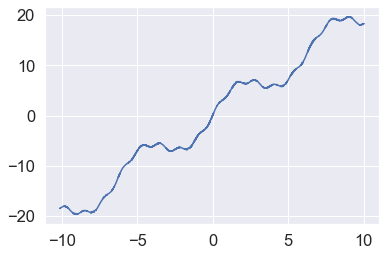

In [4]:
plt.plot(df['x'], df['y'])

Create a dataframe called `featurized_p1_data` that has 3 columns:

1. `phi1` which just be the same thing as x
2. `phi2` which should be sin(x)
3. `phi3` which shoudl be sin(5*x)

You might find `np.sin` useful.

In [5]:
dfp1=pd.DataFrame({
    'phi1': df['x'],
    'phi2': np.sin(df['x']),
    'phi3': np.sin(df['x']*5)
})

In [6]:
dfp1.head()

,phi1,phi2,phi3
0,-10.104576,0.628636,-0.254565
1,-10.117579,0.638695,-0.316854
2,-9.893642,0.451873,0.715452
3,-9.754603,0.323878,0.996934
4,-9.834811,0.398640,0.887286


Now create a linear regression model called `p1_model` that uses your 3 features to predict `y`.

In [7]:
p1_model=linear_model.LinearRegression(fit_intercept=False)
p1_model.fit(dfp1, df['y'])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

The line of code below lets you see the coefficients produced by your model.

In [8]:
p1_model.coef_

array([2. , 3. , 0.5])

And the code below will compute the mean squared error. You/ll see it is very low (almost zero). 

In [9]:
mean_squared_error(p1_model.predict(dfp1), df['y'])

3.9209584495415156e-28

The code below plots the output of your model, observe that it looks exactly the same as the original data. Our model is perfectly predicting the output.

This won't be possible with real data, of course. We were only able to get such good accuracy because the dataset was artificial.

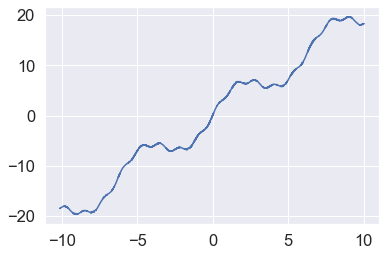

In [10]:
plt.plot(df['x'], p1_model.predict(dfp1))

## Part 2A: Fitting Diamond Price Using Carat Data
Now let's try building a linear regression model using real data.

In [11]:
file2=r'D:/Programing/python_projects/machine_learning_algorithm/data_set/diamond_training_data.csv'
diamond=pd.read_csv(file2)

In [12]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.00,Ideal,E,I1,61.8,56.0,3520,6.38,6.43,3.96
1,2.18,Ideal,I,SI2,62.5,55.0,15706,8.31,8.34,5.20
2,0.53,Ideal,H,SI1,62.2,54.0,1205,5.18,5.23,3.24
3,0.30,Ideal,G,VS1,61.5,57.0,605,4.31,4.34,2.66
4,0.76,Premium,E,SI1,58.3,62.0,2937,6.12,5.95,3.52


Create a model `carat_model` that tries to predic the price from only the carat data.

In [13]:
carat_model=LinearRegression()
carat_model.fit(diamond[['carat']], diamond[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The code below computes the mean_absolute_error. It seems that on average, our model is off by around $1,000. 

In [14]:
mean_absolute_error(carat_model.predict(diamond[['carat']]), diamond[['price']])

1079.54974806222

Below, we plot the true relationship between carat and price, as well as the output of your model (in orange).

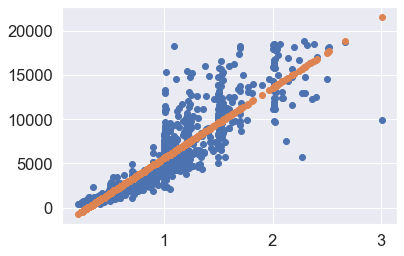

In [15]:
plt.scatter(diamond[['carat']], diamond[['price']])
plt.scatter(diamond[['carat']], carat_model.predict(diamond[['carat']]))

Below, use `PolynomialFeatures` to create a 2 dimensional numpy array (or dataframe) called `polynomial_carat_data` that contains carat, carat squared, and carat cubed as features.

In [16]:
poly=PolynomialFeatures(3)
polynomial_carat_data=poly.fit_transform(diamond[['carat']])

In [17]:
polynomial_carat_data

array([[ 1.      ,  1.      ,  1.      ,  1.      ],
       [ 1.      ,  2.18    ,  4.7524  , 10.360232],
       [ 1.      ,  0.53    ,  0.2809  ,  0.148877],
       ...,
       [ 1.      ,  1.16    ,  1.3456  ,  1.560896],
       [ 1.      ,  0.55    ,  0.3025  ,  0.166375],
       [ 1.      ,  0.57    ,  0.3249  ,  0.185193]])

Below, we fit a model to the data you just produced.

In [18]:
poly_carat_model=LinearRegression()
poly_carat_model.fit(polynomial_carat_data, diamond[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

We see that the error is now on average around \$893 dollars.

In [19]:
mean_absolute_error(poly_carat_model.predict(polynomial_carat_data), diamond[['price']])

893.3826766865598

Below we can see a scatter plot of your new model. As you can see, even though our error is lower, the model behaves quite strangely for large carat values. 

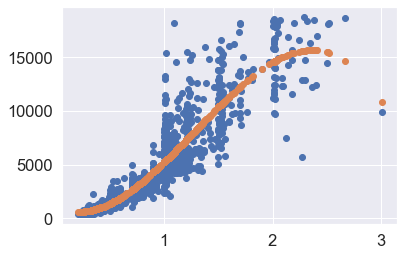

In [20]:
plt.scatter(diamond[['carat']], diamond[['price']])
plt.scatter(diamond[['carat']], poly_carat_model.predict(polynomial_carat_data))

## Part 2B: Fitting Diamond Price Using 3rd Degree Polynomial of All Numeric Data

To get even more accuracy, create a model `diamond_model` which predicts the price from a 3rd degree polynomial of the `carat`, `depth`, `table`, `x`, `y`, and `z`.

Your model should have a total of 84 coefficients.

You should also compute the mean absolute error, which should be approximately \$830.

In [21]:
numeric_diamond=diamond[['carat', 'depth', 'table', 'x', 'y', 'z']]
numeric_diamond.head()

,carat,depth,table,x,y,z
0,1.00,61.8,56.0,6.38,6.43,3.96
1,2.18,62.5,55.0,8.31,8.34,5.20
2,0.53,62.2,54.0,5.18,5.23,3.24
3,0.30,61.5,57.0,4.31,4.34,2.66
4,0.76,58.3,62.0,6.12,5.95,3.52


In [22]:
poly=PolynomialFeatures(3)
poly_numeric_diamond=poly.fit_transform(numeric_diamond)

In [23]:
diamond_model=LinearRegression()
diamond_model.fit(poly_numeric_diamond, diamond[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
diamond_model.coef_

array([[ 1.20111189e+01, -5.76714372e+07,  4.42610854e+06,
        -7.45979884e+05, -6.56258593e+06,  7.23571846e+07,
        -8.06074937e+07, -2.82519849e+06,  1.57204712e+06,
         1.62312557e+05,  7.79448690e+06,  5.47178226e+06,
        -1.75105313e+07, -6.79581816e+04,  2.28231986e+04,
         2.68828048e+04, -2.03050951e+06,  2.56295962e+06,
         2.08653255e+03,  3.69281004e+05, -1.61617957e+05,
        -4.08560137e+05, -1.80835710e+04, -4.94946460e+06,
         4.51435216e+06, -8.58148788e+06,  3.22032800e+07,
        -2.52037459e+07,  1.05654336e+04,  3.89574155e+04,
         8.10979849e+03,  1.72767508e+05,  1.15580636e+05,
        -4.90256191e+05, -1.07655739e+04, -2.11694613e+03,
        -1.10400193e+05, -7.62454145e+04,  2.47401906e+05,
        -4.26035677e+01, -1.00564452e+04, -5.86117051e+03,
         1.47437247e+04, -6.68394300e+05,  2.92211518e+05,
         1.46398231e+06, -5.19288461e+05,  1.04763308e+06,
        -1.70395391e+06,  3.52795955e+02, -1.65069285e+0

In [25]:
len(diamond_model.coef_[0])

84

In [26]:
mean_absolute_error(diamond_model.predict(poly_numeric_diamond), diamond[['price']])

830.2478295669754

## Part 2C: Plotting Training MSE vs. Polynomial Degree

Let's now explore how training error varies as a function of the diamond price. For this part, we've provided the code for you, though you might find it interesting to try to write it yourself.

In [27]:
def get_training_mae(degree):
    poly=PolynomialFeatures(degree=degree)
    poly_numeric_diamond=poly.fit_transform(numeric_diamond)
    diamond_model=LinearRegression()
    diamond_model.fit(poly_numeric_diamond, diamond[['price']])
    return mean_absolute_error(diamond_model.predict(poly_numeric_diamond), diamond[['price']])

In [28]:
maes=[get_training_mae(i) for i in range(0, 6)]

In [29]:
maes

[3134.287018666666,
 977.2853873048613,
 861.6348478382624,
 830.2478295669754,
 770.8458326009114,
 729.1646799418131]

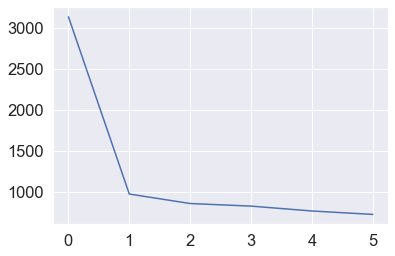

In [30]:
plt.plot(maes)

## Part 2D: Plotting Validation MAE vs. Polynomial Degree

Below, you will create a plot of the mean absolute error on the validation data set stored in the file "diamond_validation_data.csv". The first two cells are provided for you.

In [31]:
file3=r'D:/Programing/python_projects/machine_learning_algorithm/data_set/diamond_validation_data.csv'
diamond_validation=pd.read_csv(file3)
diamond_validation.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.51,Ideal,E,SI1,61.5,57.0,1682,5.11,5.16,3.16
1,0.70,Very Good,H,SI1,61.5,57.0,2107,5.64,5.68,3.48
2,1.09,Very Good,G,VS1,62.5,59.0,6827,6.54,6.57,4.10
3,1.80,Ideal,F,SI1,61.8,57.0,16513,7.83,7.79,4.83
4,0.71,Ideal,D,VS1,60.9,57.0,3518,5.74,5.76,3.50


In [32]:
numeric_diamond_validation = diamond_validation[["carat", "depth", "table", "x", "y", "z"]]

To complete this exercise, fill in the function below so that it returns the training error and validation error for a polynomial of the given degree.

The function should return two values: The first is the trainig error and the second is the validation error.

Hint: You can copy and paste code from the get_training_mae function above.

In [33]:
def get_training_and_validation_mae(degree):
    poly=PolynomialFeatures(degree)
    poly_diamond_training=poly.fit_transform(numeric_diamond)
    poly_diamond_validation=poly.fit_transform(numeric_diamond_validation)
    diamond_model=LinearRegression()
    diamond_model.fit(poly_diamond_training, diamond[['price']])
    training_error=mean_absolute_error(diamond_model.predict(poly_diamond_training), diamond[['price']])
    validation_error=mean_absolute_error(diamond_model.predict(poly_diamond_validation), diamond_validation[['price']])
    return training_error, validation_error

If your code is working correctly, the following cell should output 977.285 and 957.432.

In [34]:
get_training_and_validation_mae(1)

(977.2853873048613, 957.432016384659)

The code below will plot the training and validation error. Note that as polynomial degree goes up, we start seeing overfitting (where validation error starts going up again).

In [35]:
maes = np.array([get_training_and_validation_mae(i) for i in range(0, 6)])

In [36]:
maes

array([[ 3134.28701867,  3095.9604    ],
       [  977.2853873 ,   957.43201638],
       [  861.63484784,   859.40218723],
       [  830.24782957,  1113.93262317],
       [  770.8458326 ,  3072.69473773],
       [  729.16467994, 16119.84594785]])

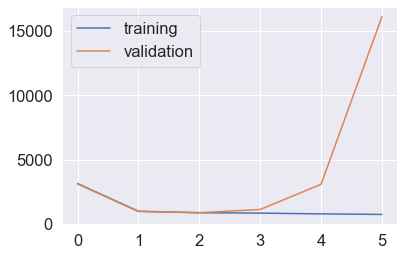

In [37]:
plt.plot(maes[:, 0])
plt.plot(maes[:, 1])
plt.legend(['training', 'validation'])

## Part 3: Perfect Accuracy?

This one is a tricky bonus question.

In [38]:
#set aside only the numeric columns

In [39]:
diamond_data_numeric_only = diamond.select_dtypes(['number'])
diamond_data_numeric_only.head(5)

,carat,depth,table,price,x,y,z
0,1.00,61.8,56.0,3520,6.38,6.43,3.96
1,2.18,62.5,55.0,15706,8.31,8.34,5.20
2,0.53,62.2,54.0,1205,5.18,5.23,3.24
3,0.30,61.5,57.0,605,4.31,4.34,2.66
4,0.76,58.3,62.0,2937,6.12,5.95,3.52


In [40]:
p3_model = LinearRegression()
p3_model.fit(diamond_data_numeric_only, diamond_data_numeric_only["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
mean_squared_error(p3_model.predict(diamond_data_numeric_only), diamond_data_numeric_only["price"])

3.0658393887350493e-24

Below, we see the mean squared error is extremely low -- it is effectively zero. How did this happen? Is this model useful?

Hint: Look at the coefficients of the model.

In [42]:
p3_model.coef_

array([ 2.49547047e-12,  2.49489546e-13, -1.50202482e-14,  1.00000000e+00,
        7.49426858e-14,  7.34939892e-14, -2.04450610e-13])

Solution: The issue is that we've included mpg in the set of features that we use to make predictions. Given mpg, it's pretty easy to predict mpg (you just set that theta to 1 and all others to 0).